In [1]:
# pip install keras

## load tensorflow library

In [2]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as KBackend
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [17]:
training_dataset='train'
validation_dataset='validation'
testing_dataset='test'

In [4]:
img_width, img_height = 250, 250
# train_data_dir = 'C:/Users/lizey/summerstudio2020/race_classification/train'
# validation_data_dir = 'C:/Users/lizey/summerstudio2020/race_clascsification/test'

In [5]:
nb_train_samples = 1250
nb_validation_samples = 130

# Define epoch for training
epochs =5
# Lower the batch size if you're training on GPU and get out of memory errors
batch_size =5
if KBackend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
model=

Prior to flattening (None, 59, 59, 64)
After flattening (None, 222784)


## Print a summary of the network

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        1

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
plot_model(model, to_file='model.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [13]:
# This is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# This is the augmentation configuration we will use for validation:
# only perform a image rescaling
validation_datagen = ImageDataGenerator(rescale=1. / 255,)

Found 5758 images belonging to 6 classes.
Found 736 images belonging to 5 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 26 steps
Epoch 1/5
250/250 [==============================] - 88s 353ms/step - loss: -14120384631.6488 - accuracy: 0.0656 - val_loss: -52423321915.0769 - val_accuracy: 0.0846
Epoch 2/5
250/250 [==============================] - 138s 550ms/step - loss: -432572433334.2720 - accuracy: 0.0656 - val_loss: -908924925479.3846 - val_accuracy: 0.0846
Epoch 3/5
250/250 [==============================] - 147s 587ms/step - loss: -3467062703030.2720 - accuracy: 0.0712 - val_loss: -5373291840748.3076 - val_accuracy: 0.0846
Epoch 4/5
250/250 [==============================] - 140s 559ms/step - loss: -14891769228427.2656 - accuracy: 0.0664 - val_loss: -19762280620662.1523 - val_accuracy: 0.0846
Epoch 5/5
250/250 [==============================] - 140s 560ms/step - loss: -46544006873288.8438 - accuracy: 0.0553 - val_loss: -55178185469006.

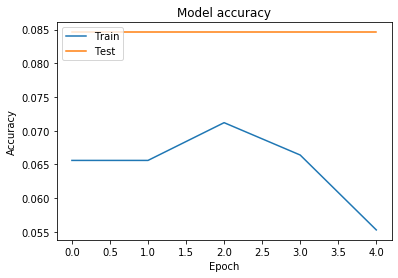

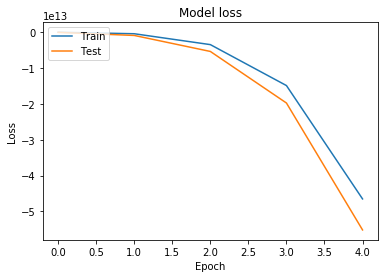

In [18]:
# Generates the data files for training with a binary  mode
train_generator = train_datagen.flow_from_directory(training_dataset,
    target_size=(img_width, img_height),
    batch_size=batch_size, class_mode='binary')


# Generates the data files for validation with a binary class mode
validation_generator = validation_datagen.flow_from_directory(validation_dataset,
    target_size=(img_width, img_height),
    batch_size=batch_size, class_mode='binary')


# Define the checkpoint
checkpoint = ModelCheckpoint('hotdoggo.h5', monitor='val_acc',
                             verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_list = [checkpoint]

# Train the model
# The double // operator is just an easy python way of dividing then rounding up/down to the nearest whole number
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks = callbacks_list)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.save_weights('races.h5')

In [ ]:
# Save the weights for future use


# Now to run some predictions
# If you want to reload the weights, define the model again as above then load the weights
# model.load_weights('races.h5')
# # Load a single image from a folder and convert to a numpy array

# from PIL import Image
# from tensorflow.keras.preprocessing import image
# import numpy as np
# predict_data_dir = 'data/test'
# classes = list(train_generator.class_indices.keys())

# predict_image = image.load_img(predict_data_dir + "/5.jpg")
# predict_image_resized = predict_image.resize([img_width, img_height])

# predict_image_array = image.img_to_array(predict_image_resized)

# predict_image_array = np.expand_dims(predict_image_array, axis=0)

# prediction = model.predict(predict_image_array, verbose=1)
# prediction_index = prediction.argmax()

# plt.imshow(predict_image)

# print("The Predicted Value is", prediction)

# print("The predicted item is a " + classes[int(prediction)])




# 0000000000000000000
# from PIL import Image
# from tensorflow.keras.preprocessing import image
# import numpy as np
# predict_data_dir = 'data/test'
# classes = list(train_generator.class_indices.keys())
#
# predict_image = image.load_img(predict_data_dir + "/5.jpg")
# predict_image_resized = predict_image.resize([img_width, img_height])
#
# predict_image_array = image.img_to_array(predict_image_resized)
#
# predict_image_array = np.expand_dims(predict_image_array, axis=0)
#
# prediction = model.predict(predict_image_array, verbose=1)
# prediction_index = prediction.argmax()
#
# plt.imshow(predict_image)
#
# print("The Predicted Value is", prediction)
#
# print("The predicted item is a " + classes[int(prediction)])
#
#
# # Lets predict the rest of the images
# import os, os.path
# predict_data_dir = 'C:/Users/lizey/summerstudio2020/race classification/test'
#
# list_of_images = os.listdir(predict_data_dir)
#
# for i in range(len(list_of_images)):
#     predict_image = image.load_img(predict_data_dir + list_of_images[i+1], target_size=(img_width, img_height))
#     predict_image_resized = predict_image.resize([img_width, img_height])
#     predict_image_array = image.img_to_array(predict_image_resized)
#     predict_image_array = np.expand_dims(predict_image_array, axis=0)
#
#     prediction = model.predict(predict_image_array, verbose=1)
#     prediction_index = prediction.argmax()
#
#     plt.figure()
#     plt.imshow(predict_image)
#     plt.show()
#     print(prediction)
#
#     print("The predicted item is a " + classes[int(prediction)] + "\n\n")